<a href="https://colab.research.google.com/github/deepiskp-99/DSA_Python_CaseStudy/blob/main/Explotory_Data_Analysis_Deepika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Load Data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_excel('/content/Sample - Superstore.xls')

In [5]:
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0     42420.0   South  FUR-BO-10

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

###**1.Uni Variate Analysis**

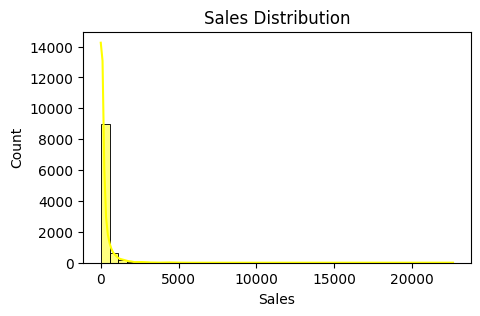

In [11]:
# 1. Histogram - Sales
plt.figure(figsize =(5,3))
sns.histplot(df['Sales'],color = 'Yellow',kde = True,bins = 40)

plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.show()


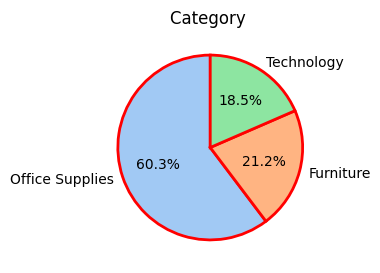

In [13]:
## 2. Pie Chart - Category
plt.figure(figsize = (5,3))

plt.pie(df['Category'].value_counts(),
        labels=df['Category'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        wedgeprops={"edgecolor":"Red","linewidth":2})

plt.title("Category ")
plt.show()

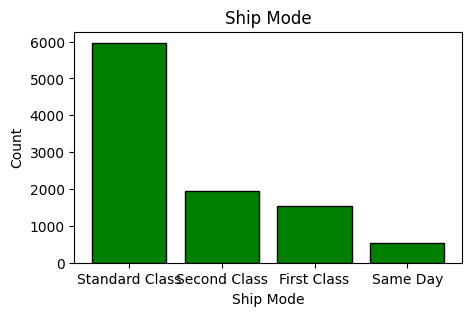

In [14]:
# Bar Chart - Ship Mode
plt.figure(figsize = (5,3))

ship_mode_counts = df['Ship Mode'].value_counts()
plt.bar(ship_mode_counts.index, ship_mode_counts.values, color = 'green',edgecolor = 'black')

plt.title('Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

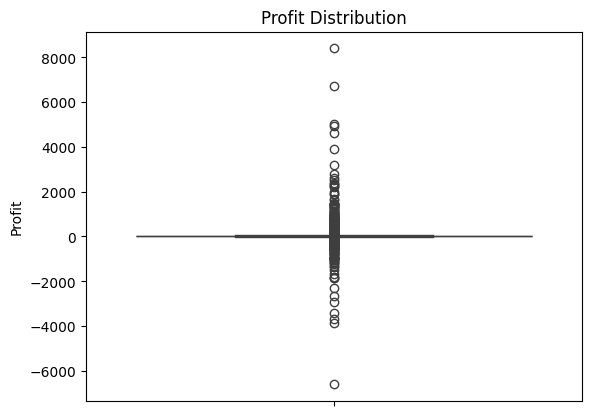

In [15]:
## Boxplot - Profit
sns.boxplot(df['Profit'])
plt.title('Profit Distribution')
plt.show()

###**2.Bivariate Analysis**

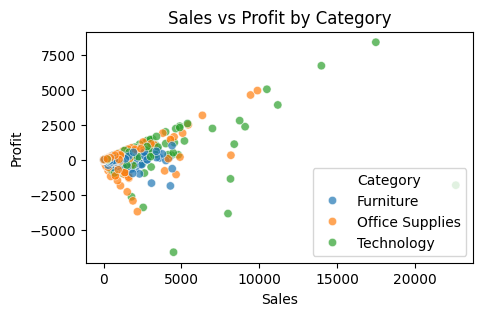

In [16]:
# Scatterplot - Sales vs Profit

plt.figure(figsize = (5,3))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df, alpha=0.7)
plt.title("Sales vs Profit by Category")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

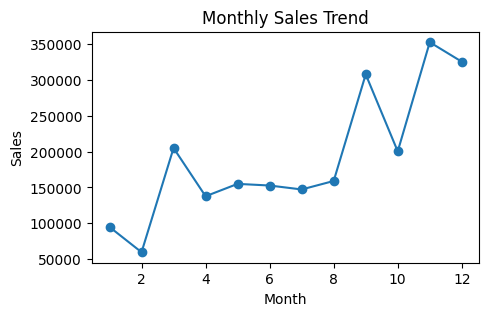

In [17]:
## Line Chart - Monthly Sales Trend

plt.figure(figsize = (5,3))

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.plot(monthly_sales.index, monthly_sales.values, marker='o')

plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()


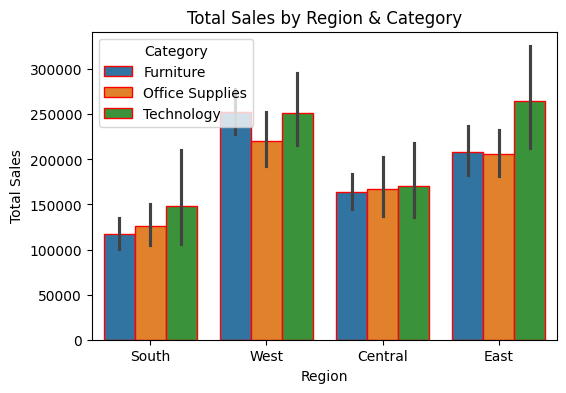

In [29]:
# Bar Plot - Region vs Sales

plt.figure(figsize = (6,4))
sns.barplot(x="Region", y="Sales", hue="Category", data=df, estimator=sum, edgecolor='red')
plt.title("Total Sales by Region & Category")
plt.ylabel("Total Sales")
plt.show()

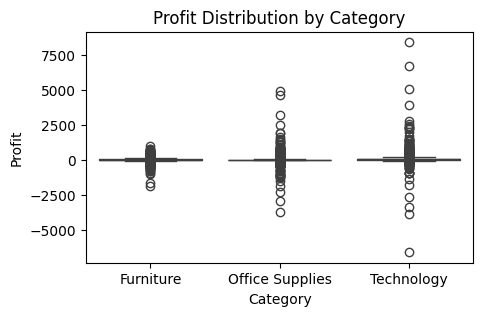

In [23]:
# Boxplot - Category vs Profit
plt.figure(figsize = (5,3))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title("Profit Distribution by Category")
plt.show()

###**3.Multivate Analysis**

<Figure size 500x300 with 0 Axes>

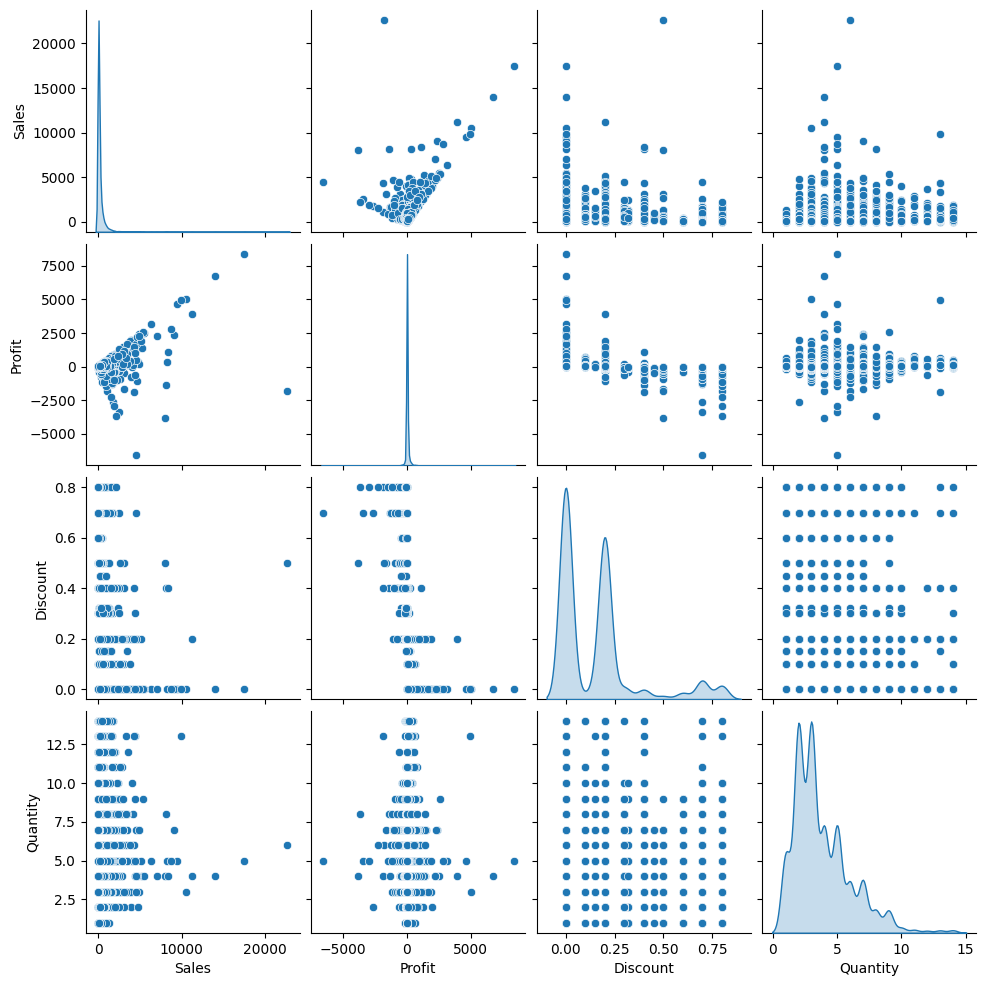

In [24]:
# Pairplot
plt.figure(figsize = (5,3))
sns.pairplot(df[['Sales','Profit','Discount','Quantity']], diag_kind='kde')
plt.show()

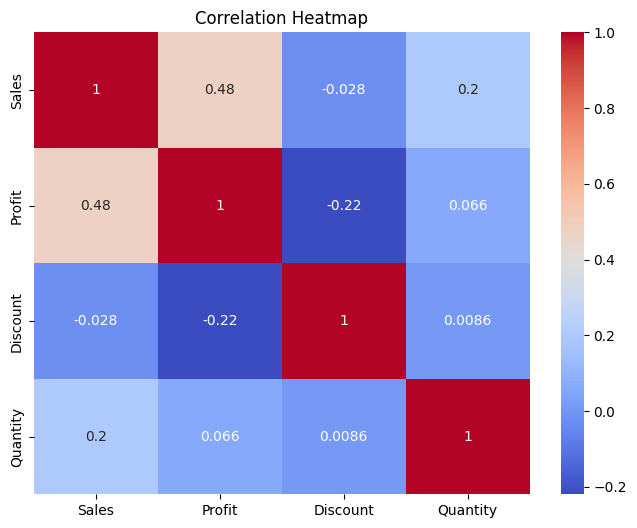

In [25]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales','Profit','Discount','Quantity']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

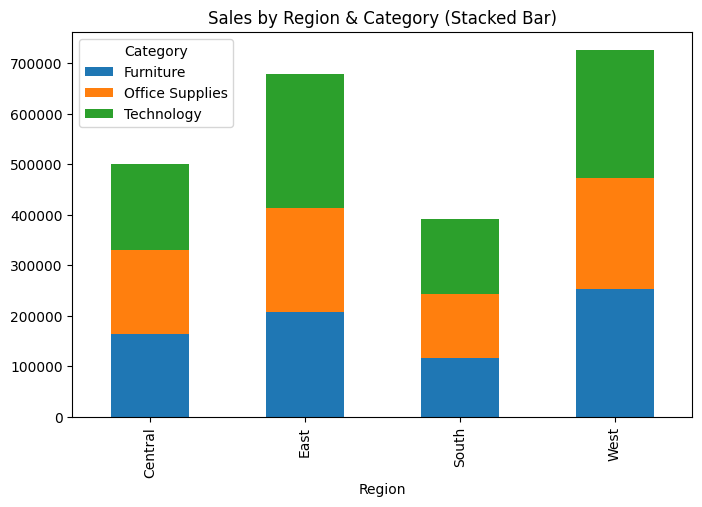

In [26]:
# Stacked Bar - Region & Category
pivot = df.pivot_table(index='Region', columns='Category', values='Sales', aggfunc='sum')
pivot.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Sales by Region & Category (Stacked Bar)")
plt.show()